# Initializing QTLab stuff

In [1]:
%run C:\qtlab_replacement\init.py
from instruments import *
import numpy as np
import sweep
import pandas as pd
from save_pkl import *
from IPython.display import clear_output

root: WARNING  Unable to load config file.


In [2]:
import os
os.chdir("C:\qtlab_replacement\instruments\_labbrick")

# Iniatializing Plotting and auxilary tools

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.ticker
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.cm as cm
import pickle
import re

# Создаем форматер
formatter = matplotlib.ticker.ScalarFormatter ()
formatter.set_powerlimits((-3, 1))
hfont = {'fontname':'Arial'}

from playsound import playsound

from ipywidgets import IntProgress
from IPython.display import display
import time

In [4]:
def unwrap_phase(datapha):
    for i in range(0, len(datapha)-1):
        if datapha[i+1]-datapha[i] >= numpy.pi:
            datapha[i+1] = datapha[i+1] - 2.*numpy.pi
        elif datapha[i+1]-datapha[i] <= -numpy.pi:
            datapha[i+1] = datapha[i+1] + 2.*numpy.pi
    return datapha
def total_unwrap(datapha):
    j = 0
    for i in range(0, len(datapha)-1):
        if datapha[i+1]-datapha[i] >= numpy.pi:
            j=j+1
        elif datapha[i+1]-datapha[i] <= -numpy.pi:
            j=j+1
    for i in range(0, j):
        unwrap_phase(datapha)
    return datapha

In [5]:
from resonator_tools import circuit

In [6]:
def zero_sound():
    playsound(r'C:\\qtlab_replacement\\voise\\zero.mp3')
def complete_sound():
    playsound(r'C:\\qtlab_replacement\\voise\\complete.mp3')    
def stable_sound():
    playsound(r'C:\\qtlab_replacement\\voise\\stable.mp3')  
def lockin_complete_sound():
    playsound(r'C:\\qtlab_replacement\\voise\\lockin_complete.mp3')
def magnetic_stable_sound():
    playsound(r'C:\\qtlab_replacement\\voise\\magnetic_stable.mp3')    

In [9]:
import urllib, requests
from datetime import datetime as dt

In [379]:
import telegram

t_id = '5102635867:AAGGWxqI7URoP5uWOyNPf99ZuJIsLQKqW-o'
c_id = '42924842'

In [380]:
def telegram_notification(message):
    now = dt.now() # current date and time
    time = now.strftime("%d/%m/%Y, %H:%M:%S")
    l_msg = time +"\n" + message

    url = 'https://api.telegram.org/bot%s/sendMessage?chat_id=%s&text=%s' % (
        t_id, c_id, urllib.parse.quote_plus(l_msg))
    _ = requests.get(url, timeout=10)
    
def telegram_photo_notification(message, path, token_id, chat_id):
    bot = telegram.Bot(token=token_id)
    bot.send_message(chat_id=chat_id, text=message)
    bot.send_photo(chat_id=chat_id, photo=open(path, 'rb'))

In [1293]:
def two_channel_set_freq(frequency):
    vna.set_xlim(frequency,frequency)
    lo1.set_frequency(2.0*frequency+10e6)

# Lab brick test

In [1571]:
get_labbricks()

{1: {'name': 'LMS-183DX', 'serial_number': 27937}}

In [1572]:
lo1 = Labbrick(name='LMS-183DX', serial=27937)

In [1573]:
lo1.set_power(-54)
lo1.get_power()

-54.0

In [1574]:
lo1.set_status(False)
lo1.set_power(-50)
lo1.set_frequency(12.000e9)

True

In [1575]:
lo1.get_frequency()

12000000000.0

In [1576]:
lo1.set_status(False)

True

# Initializing current source

                                  CURRENT SOURCE
         Source Range    Range Generated     Resolution      Max. Load Voltage
         1 mA            ±1.20000 mA         10 nA           ±30 V
         10 mA           ±12.0000 mA         100 nA          ±30 V
         100 mA          ±120.000 mA         1 μA            ±30 V
         200 mA          ±200.000 mA         1 μA            ±30 V

In [248]:
current_src = Yokogawa_GS210(address='gs210_8')

In [249]:
current_src.set_src_mode_curr()                                            # switch Yokogawa to the Current mode
current_src.set_range(1.0e-3)                                              # set current Source Range
current_src.set_current_limits(mincurrent = -1.0e-3, maxcurrent = 1.0e-3)  # set the +- maximum current ranges in [Amperes]

In [253]:
current_src.get_status()                                          # check the status 0 - off, 1 - on

0

In [637]:
current_src.set_current(0.0e-9)

True

In [252]:
current_src.set_status(0)

True

In [254]:
current_src.set_voltage_compliance(1)

True

In [255]:
current_src.get_voltage_compliance()

1.0

In [450]:
def ramp_current_sourse(final_current, sound = True, notification = False):
    STEP = 500e-9                                                       # Value of the step in [A]
    
    current_now = current_src.get_current()
    number = abs(final_current-current_now)

    steps_current = list(np.linspace(current_now, final_current, int(number/STEP+1)))
    
    for i in steps_current:
        current_src.set_current(i)
        sleep(0.1)
    if sound:
        stable_sound()
    if notification:
        telegram_notification('The current is stable')

In [1494]:
ramp_current_sourse(0e-6)

# Keysight E5071CA Vector network Analyzer

In [1495]:
vna = Keysight_E5071C('vna', address = 'VNA')

In [1496]:
vna.set_sweep_mode("LIN")

True

In [1962]:
vna.set_xlim(5.55e9,5.65e9)
vna.set_nop(1001)
vna.set_average(1)
vna.set_averages(2)
vna.set_bandwidth(1000)
vna.set_power(-65)

True

In [1964]:
x,y = vna.get_tracedata(format = 'AMPPHA')
#x,y = vna.get_tracedata(format = 'REALIMAG')

In [1965]:
vna.get_sweep_time()

968.32736

In [1966]:
freqs = vna.get_freqpoints()/1e9

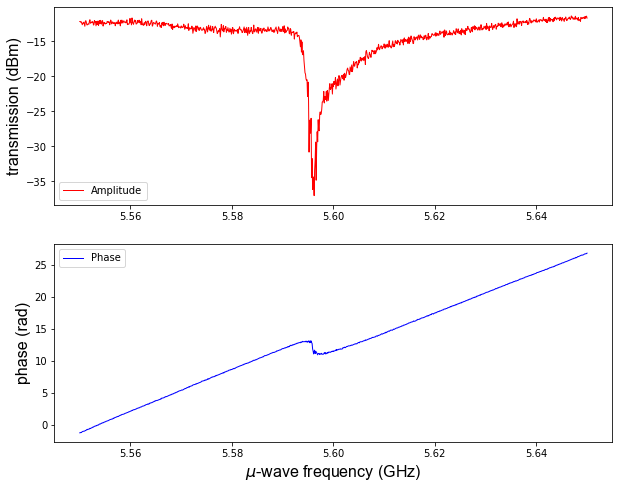

In [1967]:
fig, axes = plt.subplots(2,1,figsize=(10, 8))

p = axes[0].plot(freqs, 10*np.log(x), linewidth=1.0, c = 'r', label='Amplitude')
p = axes[1].plot(freqs, total_unwrap(y)-total_unwrap(y1), linewidth=1.0, c = 'b', label='Phase')

#axes.axis('tight')
axes[1].set_xlabel(r'$\mu$-wave frequency (GHz)', fontsize=16, **hfont)

axes[0].set_ylabel(r'transmission (dBm)', fontsize=16, **hfont)
axes[1].set_ylabel(r'phase (rad)', fontsize=16, **hfont)

axes[0].legend()
axes[1].legend()

# Compare with/without pumping

In [2081]:
current_src.set_status(1)
ramp_current_sourse(0.0e-6)  

In [1570]:
lo1.set_status(False)

True

In [1209]:
lo1.set_power(10)
lo1.set_frequency(12.039e9)

True

In [1210]:
lo1.set_status(True)
sleep(0.2)
x_pump,y_pump = vna.get_tracedata(format = 'AMPPHA')
sleep(1)
lo1.set_status(False)

True

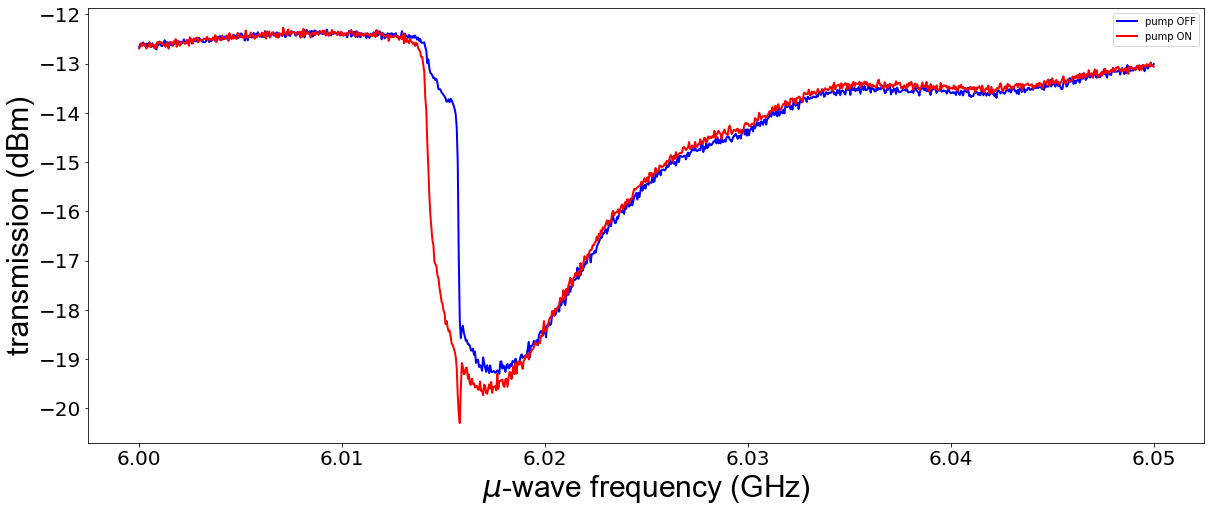

In [1211]:
fig, axes = plt.subplots(1,1,figsize=(20, 8))

p = axes.plot(freqs, 10*np.log(x), linewidth=2.0, c = 'b', label='pump OFF')
p = axes.plot(freqs, 10*np.log(x_pump), linewidth=2.0, c = 'r', label='pump ON')

#axes.axis('tight')
axes.set_xlabel(r'$\mu$-wave frequency (GHz)', fontsize=30, **hfont)
axes.tick_params(axis='x', labelsize=20)
axes.tick_params(axis='y', labelsize=20)

axes.set_ylabel(r'transmission (dBm)', fontsize=30, **hfont)
axes.legend()

save the trace data

In [163]:
name = "experimental data/vna JPA, frequency sweep 5.75-6.25 GHz at -55dBm_pump OFF"+datetime.datetime.now().strftime("%Y%m%d%H%M%S.txt")
file = open(name,"w")
for freq_id, freq_value in enumerate(freqs):
    file.write(f"{freq_value*1e9}\t")
    file.write(f"{10*np.log(x)[freq_id]}\t")
    file.write(f"{(total_unwrap(y)-total_unwrap(y1))[freq_id]/2/np.pi*360}\n")
file.close()

In [1514]:
vna.set_power(-25)

True

In [1517]:
x1,y1 = vna.get_tracedata(format = 'AMPPHA')

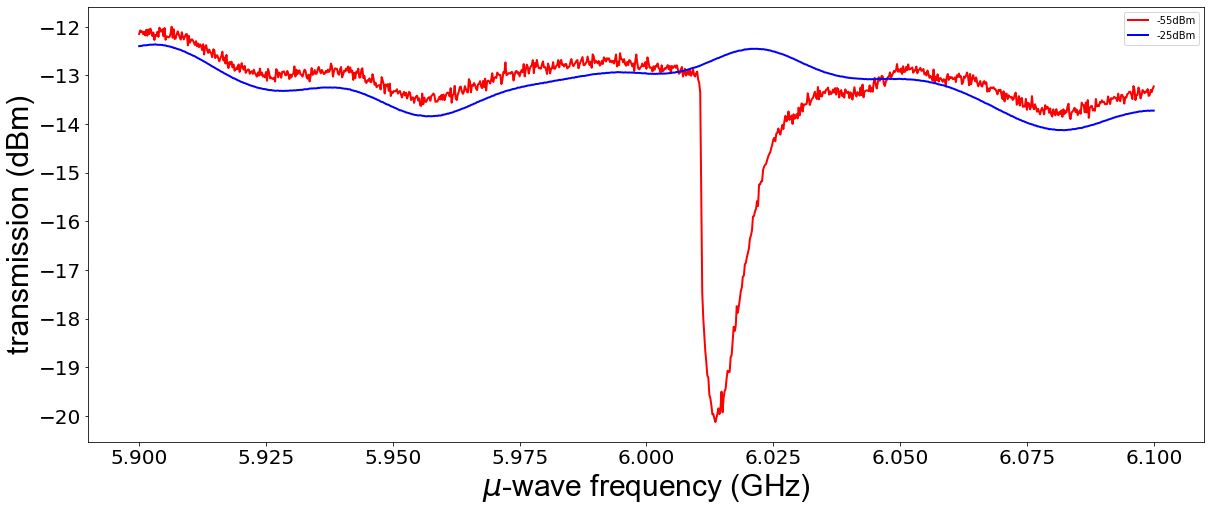

In [1518]:
fig, axes = plt.subplots(1,1,figsize=(20, 8))

p = axes.plot(freqs, 10*np.log(x), linewidth=2.0, c = 'r', label='-55dBm')
p = axes.plot(freqs, 10*np.log(x1), linewidth=2.0, c = 'b', label='-25dBm')

#axes.axis('tight')
axes.set_xlabel(r'$\mu$-wave frequency (GHz)', fontsize=30, **hfont)
axes.tick_params(axis='x', labelsize=20)
axes.tick_params(axis='y', labelsize=20)

axes.set_ylabel(r'transmission (dBm)', fontsize=30, **hfont)
axes.legend()


# Two channels sweep 

In [2065]:
current_src.set_status(1)
ramp_current_sourse(520.0e-6)  

In [2066]:
vna.set_nop(3)
vna.set_average(1)
vna.set_averages(2)
vna.set_bandwidth(100)
vna.set_power(-80)
sleep_time = vna.get_sweep_time()/1000

lo1.set_status(False)
lo1.set_power(5)

True

In [2067]:
freq_steps = 201
freq = np.linspace(5.82e9, 5.92e9, freq_steps) 

In [2068]:
f = IntProgress(min=0, max=freq_steps) # instantiate the bar
display(f) # display the bar

XX = []
YY = []

lo1.set_status(True)

for i in freq:
    two_channel_set_freq(i)
    
    x,y = vna.get_tracedata(format = 'AMPPHA')
    sleep(sleep_time)
    sleep(0.2)
    
    XX.append(x[1])
    YY.append(y[1])
    f.value += 1
    
lo1.set_status(False)

IntProgress(value=0, max=201)

True

In [2069]:
vna.set_nop(freq_steps)
vna.set_xlim(freq[0],freq[-1])
vna.set_average(1)
vna.set_averages(2)
vna.set_bandwidth(100)
vna.set_power(-80)
sleep_time = vna.get_sweep_time()/1000

In [2070]:
x,y = vna.get_tracedata(format = 'AMPPHA')
sleep(sleep_time)
x,y = vna.get_tracedata(format = 'AMPPHA')

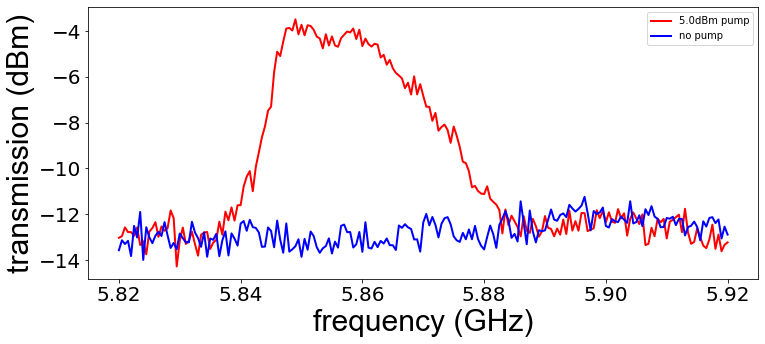

In [2071]:
fig, axes = plt.subplots(1,1,figsize=(12, 5))

p = axes.plot(freq/1e9, 10*np.log(XX), linewidth=2.0, c = 'r', label='{0}dBm pump'.format(lo1.get_power()))
p = axes.plot(freq/1e9, 10*np.log(x), linewidth=2.0, c = 'b', label='no pump')

axes.set_xlabel(r'frequency (GHz)', fontsize=30, **hfont)
axes.tick_params(axis='x', labelsize=20)
axes.tick_params(axis='y', labelsize=20)

axes.set_ylabel(r'transmission (dBm)', fontsize=30, **hfont)
axes.legend()

#PHOTO_PATH = 'experimental data/{0}.png'.format(current_src.get_current()*1e6)
#plt.savefig(PHOTO_PATH, bbox_inches="tight")
#telegram_photo_notification("Result of the measurement at {0}mkA, {1}dBm of pump, {2} dBm of signal".format(current_src.get_current()*1e6,lo1.get_power(),vna.get_power()), PHOTO_PATH, t_id, c_id)

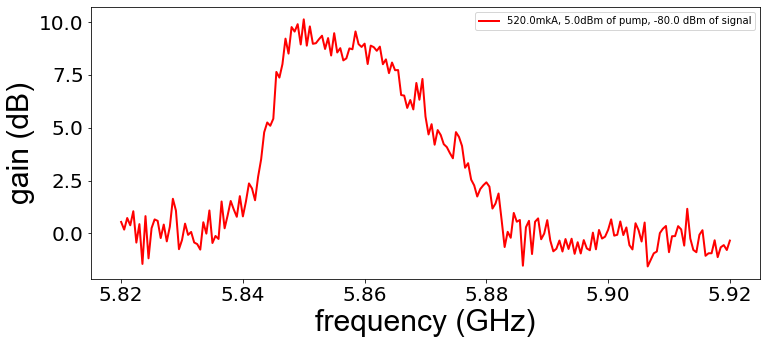

In [2072]:
fig, axes = plt.subplots(1,1,figsize=(12, 5))

p = axes.plot(freq/1e9, 10*np.log(XX)-10*np.log(x), linewidth=2.0, c = 'r', label='{0}mkA, {1}dBm of pump, {2} dBm of signal'.format(current_src.get_current()*1e6,lo1.get_power(),vna.get_power()))

axes.set_xlabel(r'frequency (GHz)', fontsize=30, **hfont)
axes.tick_params(axis='x', labelsize=20)
axes.tick_params(axis='y', labelsize=20)

axes.set_ylabel(r'gain (dB)', fontsize=30, **hfont)
axes.legend()

PHOTO_PATH = 'experimental data/{0}mkA, {1}dBm of pump, {2} dBm of signal.png'.format(current_src.get_current()*1e6,lo1.get_power(),vna.get_power())
plt.savefig(PHOTO_PATH, bbox_inches="tight")
telegram_photo_notification("Result of the measurement at {0}mkA, {1}dBm of pump, {2} dBm of signal".format(current_src.get_current()*1e6,lo1.get_power(),vna.get_power()), PHOTO_PATH, t_id, c_id)

# 3d two channel sweep frequency and pump power

In [2073]:
current_src.set_status(1)
ramp_current_sourse(520.0e-6)  

In [2074]:
vna.set_nop(3)
vna.set_average(1)
vna.set_averages(2)
vna.set_bandwidth(30)
vna.set_power(-80)
sleep_time = vna.get_sweep_time()/1000

lo1.set_status(False)

True

In [2075]:
freq_steps = 201
freq = np.linspace(5.82e9, 5.92e9, freq_steps)     

power_steps = 25
pump_power = np.linspace(-5, 7, power_steps)

In [2076]:
Transmission = np.zeros((power_steps,freq_steps), dtype=float)
Phase = np.zeros((power_steps,freq_steps), dtype=float)

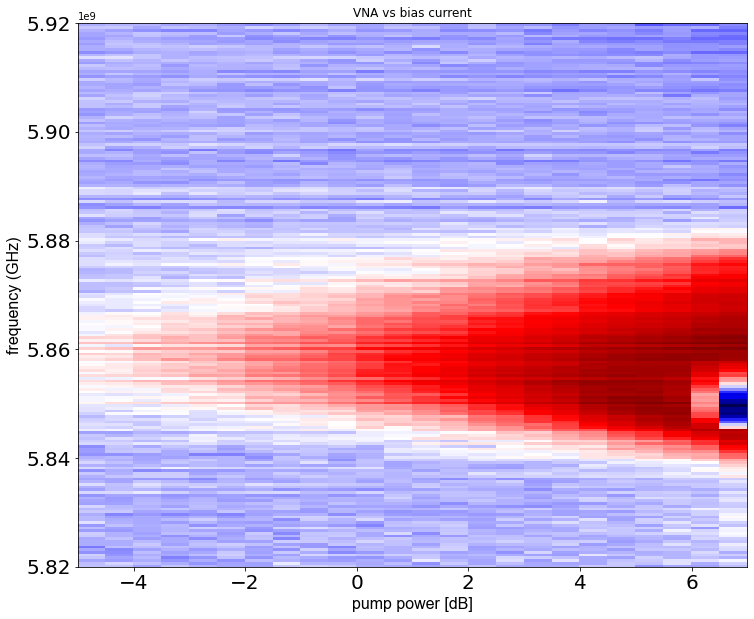

Pump power:  -5.0 [dB]


<ipython-input-2079-6db5f35681f1>:59: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = axes.pcolor(pump_power, freq, Transmission.T, cmap=cm.seismic)


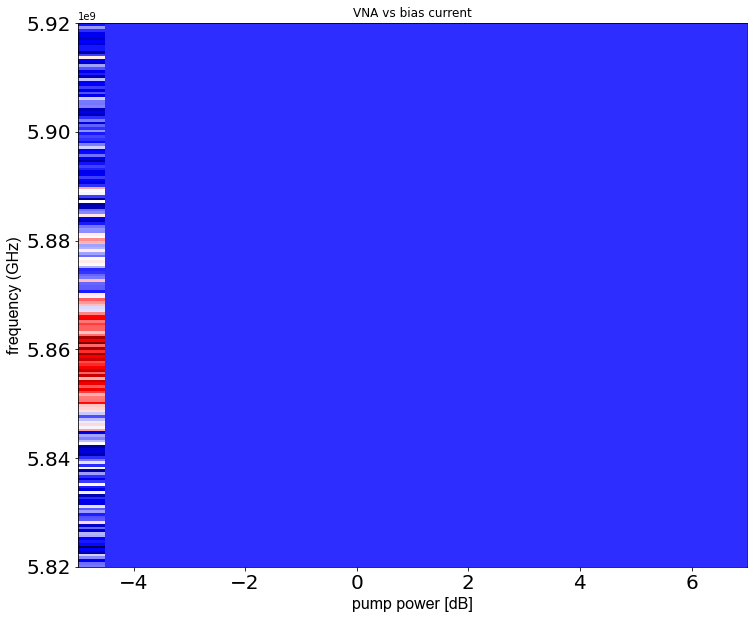

Pump power:  -4.0 [dB]
Pump power:  -4.0 [dB]
Pump power:  -4.0 [dB]
Pump power:  -3.0 [dB]
Pump power:  -2.0 [dB]
Pump power:  -2.0 [dB]
Pump power:  -2.0 [dB]
Pump power:  -1.0 [dB]
Pump power:  -0.0 [dB]
Pump power:  0.0 [dB]
Pump power:  0.0 [dB]
Pump power:  1.0 [dB]
Pump power:  2.0 [dB]
Pump power:  2.0 [dB]
Pump power:  2.0 [dB]
Pump power:  3.0 [dB]
Pump power:  4.0 [dB]
Pump power:  4.0 [dB]
Pump power:  4.0 [dB]
Pump power:  5.0 [dB]
Pump power:  6.0 [dB]
Pump power:  6.0 [dB]
Pump power:  6.0 [dB]
Pump power:  7.0 [dB]


In [2079]:
name = "experimental data/3d GAIN sweep frequency and pump power"+datetime.datetime.now().strftime("%Y%m%d%H%M%S.txt")
file = open(name,"w")

fig, axes = plt.subplots(1,1,figsize=(12, 10))
hfig = display(fig, display_id=True)

for power_id, power_value in enumerate(pump_power):
    print('Pump power: ', round(power_value,0), '[dB]')
    
    lo1.set_power(power_value)
    sleep(0.3)
    
    XX = []
    YY = []
    
    vna.set_nop(3)

    lo1.set_status(True)

    for i in freq:
        two_channel_set_freq(i)
    
        x,y = vna.get_tracedata(format = 'AMPPHA')
        sleep(sleep_time)
        sleep(0.2)
    
        XX.append(x[1])
        YY.append(y[1])
    
    lo1.set_status(False)
    
    vna.set_nop(freq_steps)
    vna.set_xlim(freq[0],freq[-1])
    sleep(0.2)
    
    x_bg, y_bg = vna.get_tracedata(format = 'AMPPHA')
    sleep(sleep_time)
    x_bg, y_bg = vna.get_tracedata(format = 'AMPPHA')
    
    file.write(f"{power_value}\n")
    file.write(f"{10*np.log(XX)-10*np.log(x_bg)}\n")
    file.write(f"{YY}\n")
    
    Transmission[power_id] = 10*np.log(XX)-10*np.log(x_bg) 
    #Phase[power_id] = total_unwrap(YY)-total_unwrap(y) 

    # dynamic plot
    axes.cla()
    #axes[1].cla()
    axes.set_title('VNA vs bias current')
    axes.tick_params(axis='x', labelsize=20)
    axes.tick_params(axis='y', labelsize=20)
    #axes[1].tick_params(axis='x', labelsize=20)
    #axes[1].tick_params(axis='y', labelsize=20)
    axes.set_ylabel('frequency (GHz)', fontsize=16, **hfont)
    axes.set_xlabel('pump power [dB]', fontsize=16, **hfont)
    #axes[1].set_ylabel('frequency (GHz)', fontsize=16, **hfont)
    
    p = axes.pcolor(pump_power, freq, Transmission.T, cmap=cm.seismic)
    #p = axes[1].pcolor(pump_power, freq, Phase.T, cmap=cm.seismic)
    
    hfig.update(fig)
    plt.pause(0.1)
    
#ramp_current_sourse(-200.0e-6)    
#current_src.set_status(0)
file.close()
complete_sound()

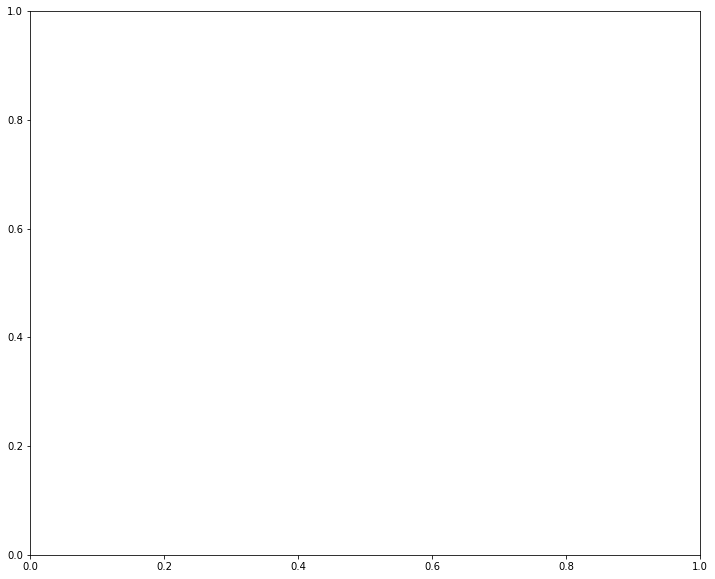

<ipython-input-2080-1043d215f242>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = axes.pcolor(pump_power, freq/1e9, Transmission.T, cmap=cm.seismic)


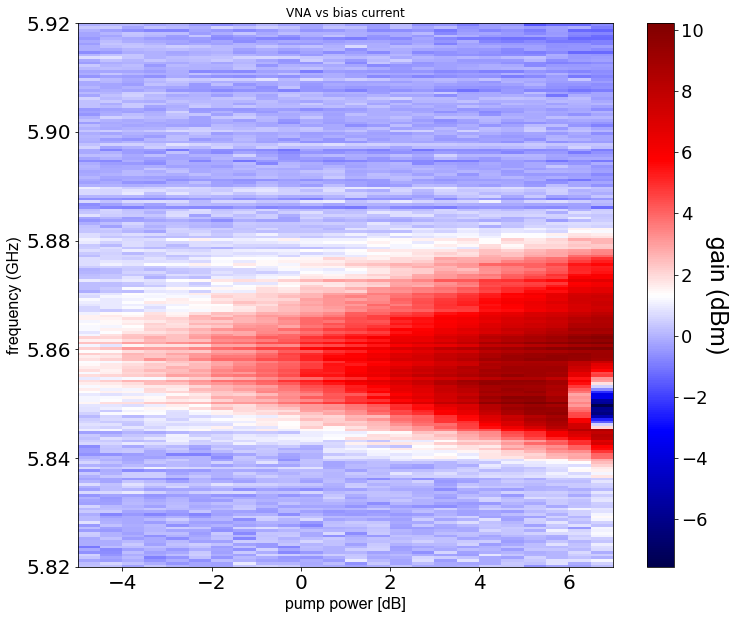

In [2080]:
fig, axes = plt.subplots(1,1,figsize=(12, 10))
hfig = display(fig, display_id=True)

axes.set_title('VNA vs bias current')
axes.tick_params(axis='x', labelsize=20)
axes.tick_params(axis='y', labelsize=20)

axes.set_ylabel('frequency (GHz)', fontsize=16, **hfont)
axes.set_xlabel('pump power [dB]', fontsize=16, **hfont)

p = axes.pcolor(pump_power, freq/1e9, Transmission.T, cmap=cm.seismic)

cb = fig.colorbar(p, ax=axes)
cb.set_label(r'gain (dBm)', labelpad=20, rotation=270, fontsize=24, **hfont)
cb.ax.tick_params(labelsize=18)

# 3d two channel sweep pump and signal power

In [1687]:
current_src.set_status(1)
ramp_current_sourse(400.0e-6)  

In [1688]:
vna.set_nop(3)
vna.set_average(1)
vna.set_averages(2)
vna.set_bandwidth(100)
vna.set_power(-80)
sleep_time = vna.get_sweep_time()/1000

lo1.set_status(False)
lo1.set_power(-5)

True

In [1689]:
VNA_power_steps = 26
VNA_power = np.linspace(-85, -60, VNA_power_steps) 

pump_power_steps = 36
pump_power = np.linspace(-25, 10, pump_power_steps)

In [1697]:
Transmission = np.zeros((power_steps,VNA_power_steps), dtype=float)
Phase = np.zeros((power_steps,VNA_power_steps), dtype=float)

In [1698]:
two_channel_set_freq(5.935e9)

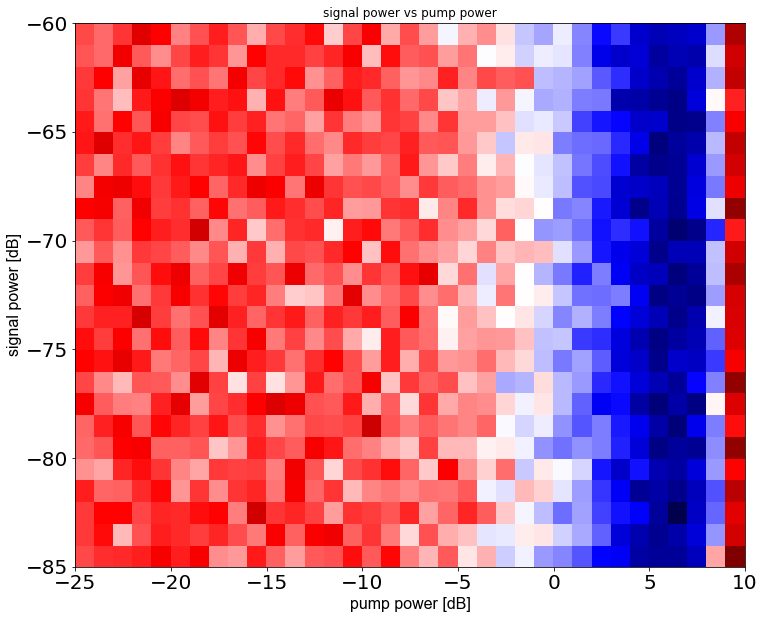

Pump power:  -25.0 [dB]


<ipython-input-1700-46fc8dbc1f1d>:48: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = axes.pcolor(pump_power, VNA_power, Transmission.T, cmap=cm.seismic)


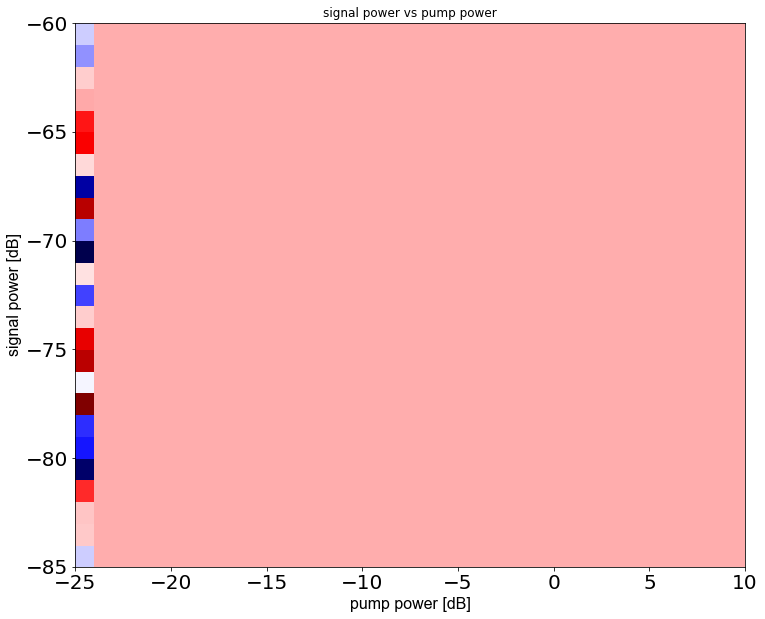

Pump power:  -24.0 [dB]
Pump power:  -23.0 [dB]
Pump power:  -22.0 [dB]
Pump power:  -21.0 [dB]
Pump power:  -20.0 [dB]
Pump power:  -19.0 [dB]
Pump power:  -18.0 [dB]
Pump power:  -17.0 [dB]
Pump power:  -16.0 [dB]
Pump power:  -15.0 [dB]
Pump power:  -14.0 [dB]
Pump power:  -13.0 [dB]
Pump power:  -12.0 [dB]
Pump power:  -11.0 [dB]
Pump power:  -10.0 [dB]
Pump power:  -9.0 [dB]
Pump power:  -8.0 [dB]
Pump power:  -7.0 [dB]
Pump power:  -6.0 [dB]
Pump power:  -5.0 [dB]
Pump power:  -4.0 [dB]
Pump power:  -3.0 [dB]
Pump power:  -2.0 [dB]
Pump power:  -1.0 [dB]
Pump power:  0.0 [dB]
Pump power:  1.0 [dB]
Pump power:  2.0 [dB]
Pump power:  3.0 [dB]
Pump power:  4.0 [dB]
Pump power:  5.0 [dB]
Pump power:  6.0 [dB]
Pump power:  7.0 [dB]
Pump power:  8.0 [dB]
Pump power:  9.0 [dB]
Pump power:  10.0 [dB]


In [1700]:
name = "experimental data/3d GAIN sweep vna and pump power"+datetime.datetime.now().strftime("%Y%m%d%H%M%S.txt")
file = open(name,"w")

fig, axes = plt.subplots(1,1,figsize=(12, 10))
hfig = display(fig, display_id=True)

for power_id, power_value in enumerate(pump_power):
    print('Pump power: ', round(power_value,0), '[dB]')
    
    lo1.set_power(power_value)
    sleep(0.3)
    
    XX = []
    YY = []

    for i in VNA_power:
        lo1.set_status(True)
        sleep(0.1)
        x,y = vna.get_tracedata(format = 'AMPPHA')
        sleep(sleep_time)
        lo1.set_status(False)
        sleep(0.1)
        x_nopump,y_nopump = vna.get_tracedata(format = 'AMPPHA')
        sleep(sleep_time)
    
        XX.append(10*np.log(x[1])-10*np.log(x_nopump[1]))
        YY.append(y[1]-y_nopump[1])
    
    file.write(f"{power_value}\n")
    file.write(f"{XX}\n")
    file.write(f"{YY}\n")
    
    Transmission[power_id] = XX
    #Phase[power_id] = total_unwrap(YY)-total_unwrap(y) 

    # dynamic plot
    axes.cla()
    #axes[1].cla()
    axes.set_title('signal power vs pump power')
    axes.tick_params(axis='x', labelsize=20)
    axes.tick_params(axis='y', labelsize=20)
    #axes[1].tick_params(axis='x', labelsize=20)
    #axes[1].tick_params(axis='y', labelsize=20)
    axes.set_ylabel('signal power [dB]', fontsize=16, **hfont)
    axes.set_xlabel('pump power [dB]', fontsize=16, **hfont)
    #axes[1].set_ylabel('frequency (GHz)', fontsize=16, **hfont)
    
    p = axes.pcolor(pump_power, VNA_power, Transmission.T, cmap=cm.seismic)
    #p = axes[1].pcolor(pump_power, VNA_power, Phase.T, cmap=cm.seismic)
    
    hfig.update(fig)
    plt.pause(0.1)
    
#ramp_current_sourse(-200.0e-6)    
#current_src.set_status(0)
file.close()
complete_sound()

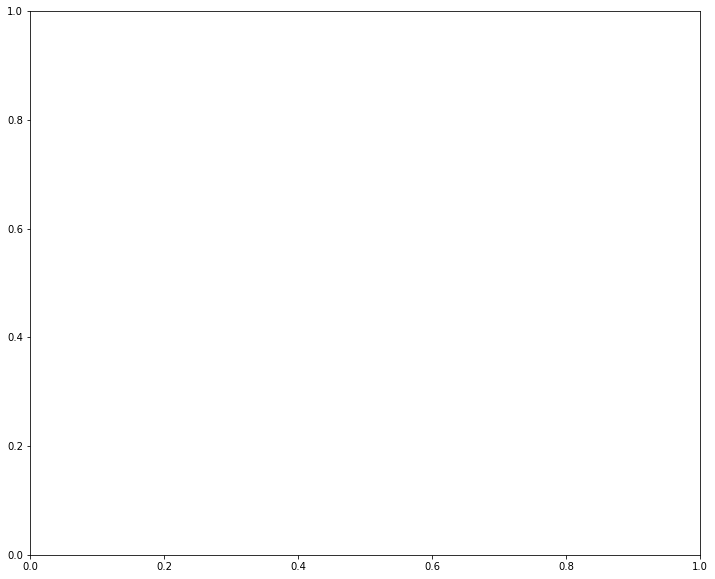

<ipython-input-1705-2c151b00cd7d>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = axes.pcolor(pump_power, VNA_power, Transmission.T, cmap=cm.seismic)


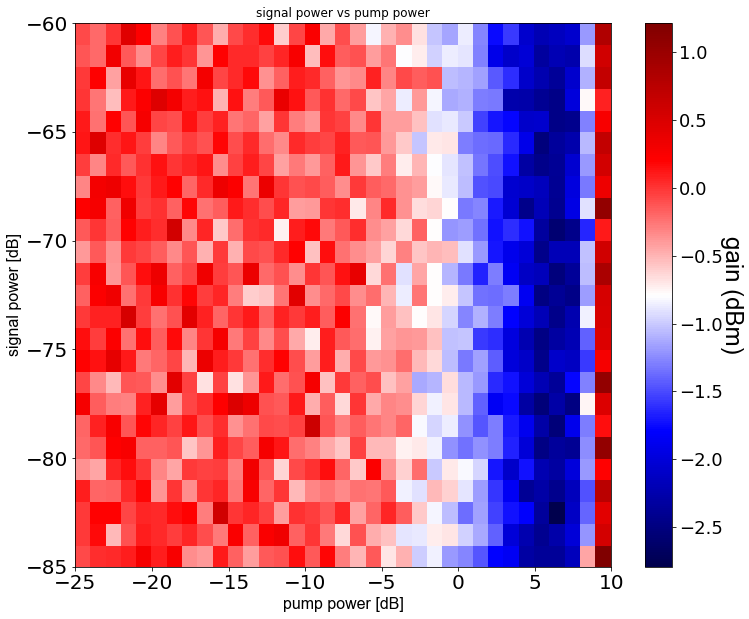

In [1705]:
fig, axes = plt.subplots(1,1,figsize=(12, 10))
hfig = display(fig, display_id=True)

axes.set_title('signal power vs pump power')
axes.tick_params(axis='x', labelsize=20)
axes.tick_params(axis='y', labelsize=20)

axes.set_ylabel('signal power [dB]', fontsize=16, **hfont)
axes.set_xlabel('pump power [dB]', fontsize=16, **hfont)

p = axes.pcolor(pump_power, VNA_power, Transmission.T, cmap=cm.seismic)

cb = fig.colorbar(p, ax=axes)
cb.set_label(r'gain (dBm)', labelpad=20, rotation=270, fontsize=24, **hfont)
cb.ax.tick_params(labelsize=18)

# fitting the Q-factor from the trace data

Fit results: {'Qi': 2383.617267214253, 'Qc': 442.5014231268119, 'Ql': 373.21646700006727, 'fr': 6022637067.33299, 'theta0': 0.11422255083929209, 'Ql_err': 29.737276734206205, 'Qc_err': 24.433012440861013, 'fr_err': 499515.3439330096, 'chi_square': 0.19937859291415289, 'Qi_err': 760.3695092893828}


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


,Qi,Qc,Ql,fr,theta0,Ql_err,Qc_err,fr_err,chi_square,Qi_err
0,2.38e+03,4.43e+02,3.73e+02,6.02e+09,1.14e-01,2.97e+01,2.44e+01,5.00e+05,1.99e-01,7.60e+02


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


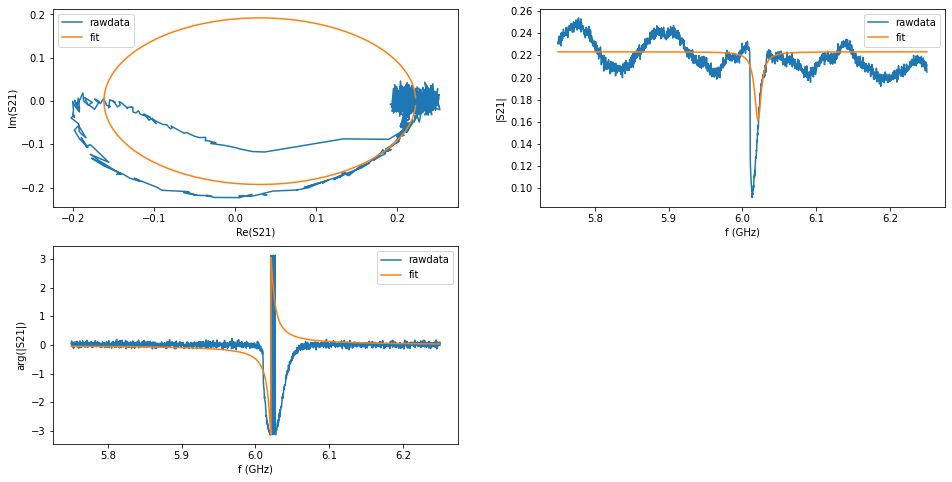

single photon limit: -130.66463356705873 dBm
done


In [167]:
#port1 = circuit.notch_port()
port1 = circuit.reflection_port()
port1.add_fromtxt('experimental data/vna JPA, frequency sweep 5.75-6.25 GHz at -55dBm_pump OFF20220724180706.txt','dBmagphasedeg',1)
port1.autofit()
#print("Fit results:", port1.fitresults)
display(pd.DataFrame([port1.fitresults]).applymap(lambda x: "{0:.2e}".format(x)))
port1.autofit(electric_delay=0.)
plt.rcParams["figure.figsize"] = [16,8]
port1.plotall()
print("single photon limit:", port1.get_single_photon_limit(), "dBm")
print("done")

# VNA data vs DC-bias

In [779]:
ramp_current_sourse(600.0e-6)

In [807]:
current_src.get_current()

0.0006

In [809]:
vna.set_xlim(5.75e9,6.05e9)
vna.set_nop(2001)
vna.set_average(1)
vna.set_averages(2)
vna.set_bandwidth(1000)
vna.set_power(-55)
sleep_time = vna.get_sweep_time()/1000

In [812]:
x,y = vna.get_tracedata(format = 'AMPPHA')

In [813]:
freq_steps = vna.get_nop()
freq=np.linspace(vna.get_startfreq()/1e9,vna.get_stopfreq()/1e9, freq_steps)       

current_steps = 201
current = np.linspace(current_src.get_current(), -750.0e-6, current_steps)

print('Measurement time: ',time.strftime('%H:%M:%S', time.gmtime((sleep_time+0.5)*current_steps)))

Measurement time:  00:08:10


In [814]:
Transmission = np.zeros((current_steps,freq_steps), dtype=float)
Phase = np.zeros((current_steps,freq_steps), dtype=float)

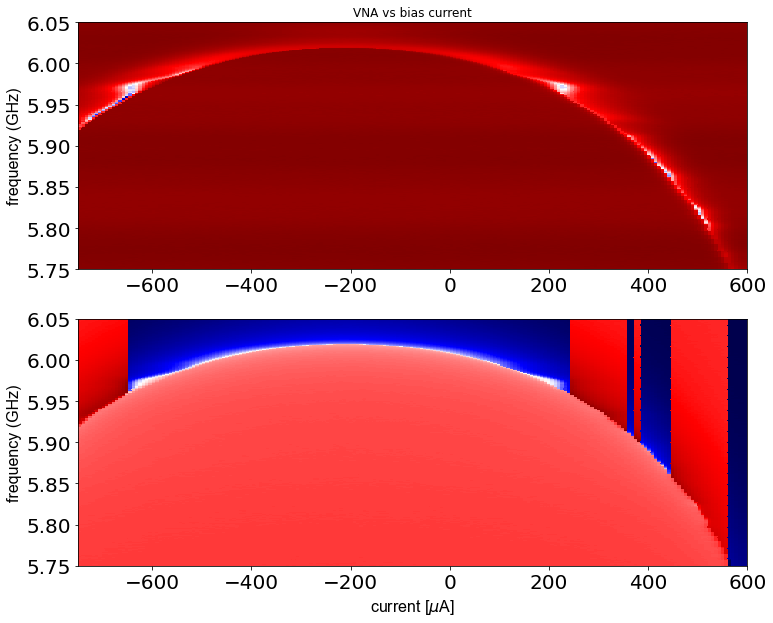

Current:  600000.0 [nA]


<ipython-input-815-a6b417c2586f>:38: RuntimeWarning: divide by zero encountered in log
  p = axes[0].pcolor(current*1e6, freq, 10*np.log(Transmission.T), cmap=cm.seismic)
<ipython-input-815-a6b417c2586f>:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = axes[0].pcolor(current*1e6, freq, 10*np.log(Transmission.T), cmap=cm.seismic)
<ipython-input-815-a6b417c2586f>:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = axes[1].pcolor(current*1e6, freq,  Phas

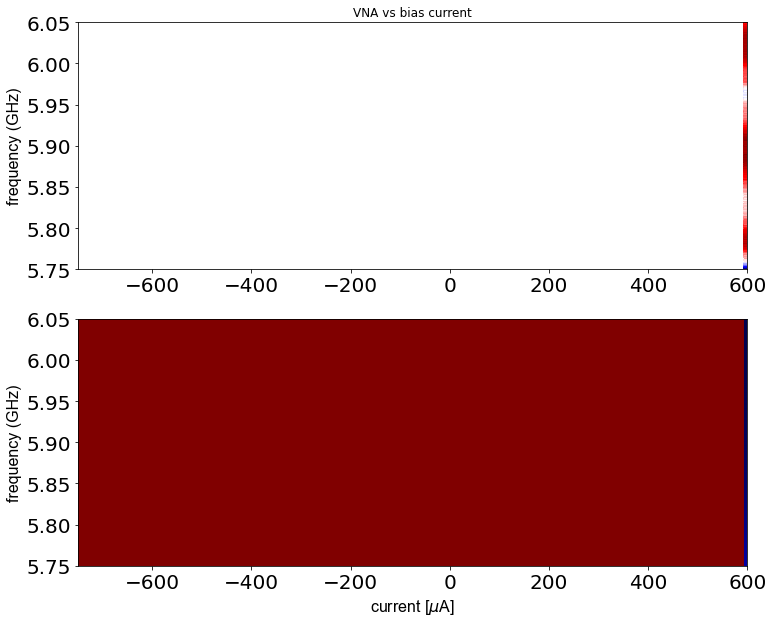

Current:  593250.0 [nA]
Current:  586500.0 [nA]
Current:  579750.0 [nA]
Current:  573000.0 [nA]
Current:  566250.0 [nA]
Current:  559500.0 [nA]
Current:  552750.0 [nA]
Current:  546000.0 [nA]
Current:  539250.0 [nA]
Current:  532500.0 [nA]
Current:  525750.0 [nA]
Current:  519000.0 [nA]
Current:  512250.0 [nA]
Current:  505500.0 [nA]
Current:  498750.0 [nA]
Current:  492000.0 [nA]
Current:  485250.0 [nA]
Current:  478500.0 [nA]
Current:  471750.0 [nA]
Current:  465000.0 [nA]
Current:  458250.0 [nA]
Current:  451500.0 [nA]
Current:  444750.0 [nA]
Current:  438000.0 [nA]
Current:  431250.0 [nA]
Current:  424500.0 [nA]
Current:  417750.0 [nA]
Current:  411000.0 [nA]
Current:  404250.0 [nA]
Current:  397500.0 [nA]
Current:  390750.0 [nA]
Current:  384000.0 [nA]
Current:  377250.0 [nA]
Current:  370500.0 [nA]
Current:  363750.0 [nA]
Current:  357000.0 [nA]
Current:  350250.0 [nA]
Current:  343500.0 [nA]
Current:  336750.0 [nA]
Current:  330000.0 [nA]
Current:  323250.0 [nA]
Current:  316500

In [815]:
name = "experimental data/vna JPA 3Dscan,current sweep from 600 to -750mkA"+datetime.datetime.now().strftime("%Y%m%d%H%M%S.txt")
file = open(name,"w")

fig, axes = plt.subplots(2,1,figsize=(12, 10))
hfig = display(fig, display_id=True)

current_src.set_status(1)

for current_id, current_value in enumerate(current):
    print('Current: ', round(current_value*1e9,0), '[nA]')
    
    current_src.set_current(current_value)
    sleep(0.3)
    
    x,y = vna.get_tracedata(format = 'AMPPHA')
    sleep(sleep_time)
    sleep(0.2)
    
    file.write(f"{current_value}\n")
    file.write(f"{x}\n")
    file.write(f"{y}\n")
    
    Transmission[current_id] = x 
    Phase[current_id] = total_unwrap(y)-total_unwrap(y1) 

    # dynamic plot
    axes[0].cla()
    axes[1].cla()
    axes[0].set_title('VNA vs bias current')
    axes[0].tick_params(axis='x', labelsize=20)
    axes[0].tick_params(axis='y', labelsize=20)
    axes[1].tick_params(axis='x', labelsize=20)
    axes[1].tick_params(axis='y', labelsize=20)
    axes[0].set_ylabel('frequency (GHz)', fontsize=16, **hfont)
    axes[1].set_xlabel('current [$\mu$A]', fontsize=16, **hfont)
    axes[1].set_ylabel('frequency (GHz)', fontsize=16, **hfont)
    
    p = axes[0].pcolor(current*1e6, freq, 10*np.log(Transmission.T), cmap=cm.seismic)
    
    p = axes[1].pcolor(current*1e6, freq,  Phase.T, cmap=cm.seismic)
    
    hfig.update(fig)
    plt.pause(0.1)
    
ramp_current_sourse(-200.0e-6)    
#current_src.set_status(0)
file.close()
complete_sound()

<ipython-input-816-ac70d8c79d39>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = axes[0].pcolor(current*1e6, freq, 10*np.log(Transmission.T), cmap=cm.seismic)
<ipython-input-816-ac70d8c79d39>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = axes[1].pcolor(current*1e6, freq,  Phase.T, cmap=cm.seismic)


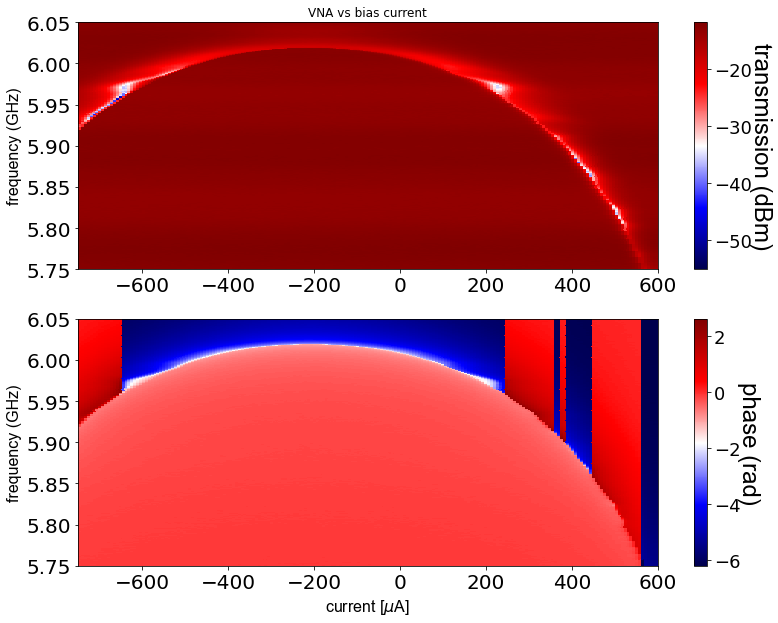

In [816]:
fig, axes = plt.subplots(2,1,figsize=(13, 10))

axes[0].set_title('VNA vs bias current')
axes[0].tick_params(axis='x', labelsize=20)
axes[0].tick_params(axis='y', labelsize=20)
axes[1].tick_params(axis='x', labelsize=20)
axes[1].tick_params(axis='y', labelsize=20)
axes[0].set_ylabel('frequency (GHz)', fontsize=16, **hfont)
axes[1].set_xlabel('current [$\mu$A]', fontsize=16, **hfont)
axes[1].set_ylabel('frequency (GHz)', fontsize=16, **hfont)
    
p = axes[0].pcolor(current*1e6, freq, 10*np.log(Transmission.T), cmap=cm.seismic)   
cb = fig.colorbar(p, ax=axes[0])
cb.set_label(r'transmission (dBm)', labelpad=20, rotation=270, fontsize=24, **hfont)
cb.ax.tick_params(labelsize=18)
    
p = axes[1].pcolor(current*1e6, freq,  Phase.T, cmap=cm.seismic)
cb = fig.colorbar(p, ax=axes[1])
cb.set_label(r'phase (rad)', labelpad=20, rotation=270, fontsize=24, **hfont)
cb.ax.tick_params(labelsize=18)
    

plt.gcf().set_size_inches(13,10)
plt.savefig("experimental data/+600-750mkA.png", bbox_inches="tight")
PHOTO_PATH = 'experimental data/+600-750mkA.png'
telegram_photo_notification("Result of the measurement", PHOTO_PATH, t_id, c_id)
complete_sound()

# Same with pump at $2f_{signal}+10$kHz

In [1265]:
ramp_current_sourse(600.0e-6)

In [1266]:
current_src.get_current()

0.0006

In [1270]:
vna.set_nop(3)
vna.set_average(1)
vna.set_averages(2)
vna.set_bandwidth(100)
vna.set_power(-55)
sleep_time = vna.get_sweep_time()/1000

lo1.set_status(False)
lo1.set_power(-20)

def two_channel_set_freq(frequency):
    vna.set_xlim(frequency,frequency)
    lo1.set_frequency(2.0*frequency+10e6)

In [1271]:
two_channel_set_freq(6e9)

In [1278]:
x,y = vna.get_tracedata(format = 'AMPPHA')

In [1282]:
freq_steps = 101
freq=np.linspace(5.75e9,6.05e9, freq_steps)       

current_steps = 201
current = np.linspace(current_src.get_current(), -750.0e-6, current_steps)

print('Measurement time: ',time.strftime('%H:%M:%S', time.gmtime(freq_steps*(sleep_time+0.5)*current_steps)))

Measurement time:  02:58:55


In [1283]:
Transmission = np.zeros((current_steps,freq_steps), dtype=float)
Phase = np.zeros((current_steps,freq_steps), dtype=float)

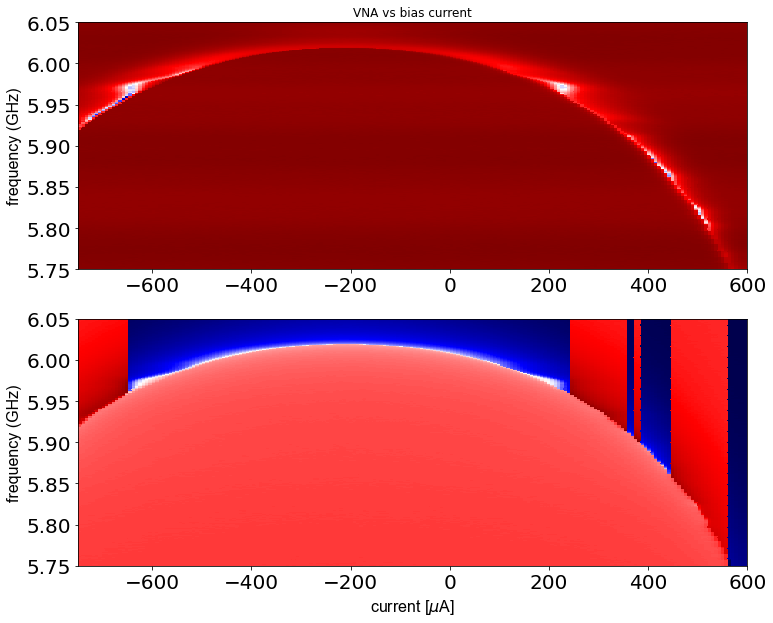

Current:  600000.0 [nA]


<ipython-input-815-a6b417c2586f>:38: RuntimeWarning: divide by zero encountered in log
  p = axes[0].pcolor(current*1e6, freq, 10*np.log(Transmission.T), cmap=cm.seismic)
<ipython-input-815-a6b417c2586f>:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = axes[0].pcolor(current*1e6, freq, 10*np.log(Transmission.T), cmap=cm.seismic)
<ipython-input-815-a6b417c2586f>:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = axes[1].pcolor(current*1e6, freq,  Phas

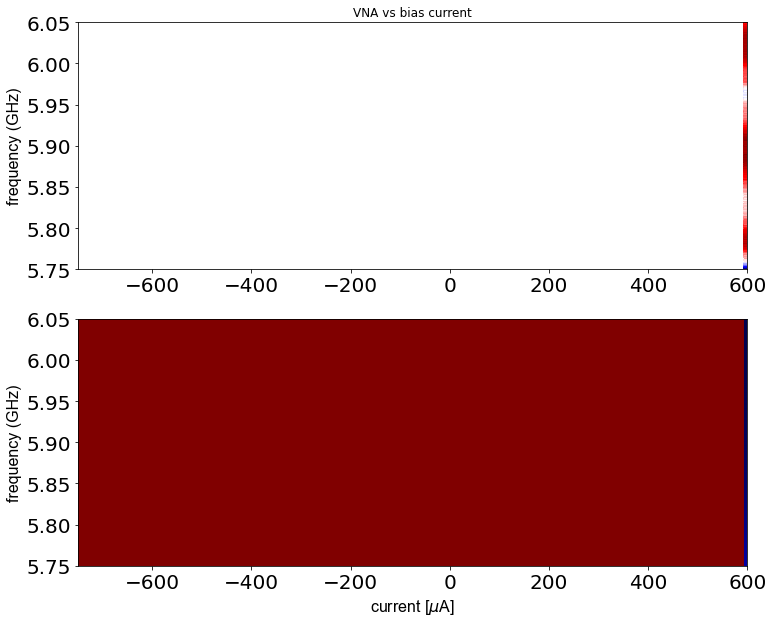

Current:  593250.0 [nA]
Current:  586500.0 [nA]
Current:  579750.0 [nA]
Current:  573000.0 [nA]
Current:  566250.0 [nA]
Current:  559500.0 [nA]
Current:  552750.0 [nA]
Current:  546000.0 [nA]
Current:  539250.0 [nA]
Current:  532500.0 [nA]
Current:  525750.0 [nA]
Current:  519000.0 [nA]
Current:  512250.0 [nA]
Current:  505500.0 [nA]
Current:  498750.0 [nA]
Current:  492000.0 [nA]
Current:  485250.0 [nA]
Current:  478500.0 [nA]
Current:  471750.0 [nA]
Current:  465000.0 [nA]
Current:  458250.0 [nA]
Current:  451500.0 [nA]
Current:  444750.0 [nA]
Current:  438000.0 [nA]
Current:  431250.0 [nA]
Current:  424500.0 [nA]
Current:  417750.0 [nA]
Current:  411000.0 [nA]
Current:  404250.0 [nA]
Current:  397500.0 [nA]
Current:  390750.0 [nA]
Current:  384000.0 [nA]
Current:  377250.0 [nA]
Current:  370500.0 [nA]
Current:  363750.0 [nA]
Current:  357000.0 [nA]
Current:  350250.0 [nA]
Current:  343500.0 [nA]
Current:  336750.0 [nA]
Current:  330000.0 [nA]
Current:  323250.0 [nA]
Current:  316500

In [815]:
name = "experimental data/vna JPA 3Dscan,current sweep from 600 to -750mkA"+datetime.datetime.now().strftime("%Y%m%d%H%M%S.txt")
file = open(name,"w")

fig, axes = plt.subplots(2,1,figsize=(12, 10))
hfig = display(fig, display_id=True)

current_src.set_status(1)

for current_id, current_value in enumerate(current):
    print('Current: ', round(current_value*1e9,0), '[nA]')
    
    current_src.set_current(current_value)
    sleep(0.3)
    
    XX = []
    YY = []
    
    for freq_id, freq_value in enumerate(freq):
        two_channel_set_freq(freq_value)
        
        x,y = vna.get_tracedata(format = 'AMPPHA')
        sleep(sleep_time)
        sleep(0.1)
        XX.append(x[1])
        YY.append(y[1])
    
    file.write(f"{current_value}\n")
    file.write(f"{XX}\n")
    file.write(f"{YY}\n")
    
    Transmission[current_id] = x 
    Phase[current_id] = total_unwrap(y)-total_unwrap(y1) 

    # dynamic plot
    axes[0].cla()
    axes[1].cla()
    axes[0].set_title('VNA vs bias current')
    axes[0].tick_params(axis='x', labelsize=20)
    axes[0].tick_params(axis='y', labelsize=20)
    axes[1].tick_params(axis='x', labelsize=20)
    axes[1].tick_params(axis='y', labelsize=20)
    axes[0].set_ylabel('frequency (GHz)', fontsize=16, **hfont)
    axes[1].set_xlabel('current [$\mu$A]', fontsize=16, **hfont)
    axes[1].set_ylabel('frequency (GHz)', fontsize=16, **hfont)
    
    p = axes[0].pcolor(current*1e6, freq, 10*np.log(Transmission.T), cmap=cm.seismic)
    
    p = axes[1].pcolor(current*1e6, freq,  Phase.T, cmap=cm.seismic)
    
    hfig.update(fig)
    plt.pause(0.1)
    
ramp_current_sourse(-0.0e-6)    
current_src.set_status(0)
file.close()
complete_sound()

<ipython-input-816-ac70d8c79d39>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = axes[0].pcolor(current*1e6, freq, 10*np.log(Transmission.T), cmap=cm.seismic)
<ipython-input-816-ac70d8c79d39>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = axes[1].pcolor(current*1e6, freq,  Phase.T, cmap=cm.seismic)


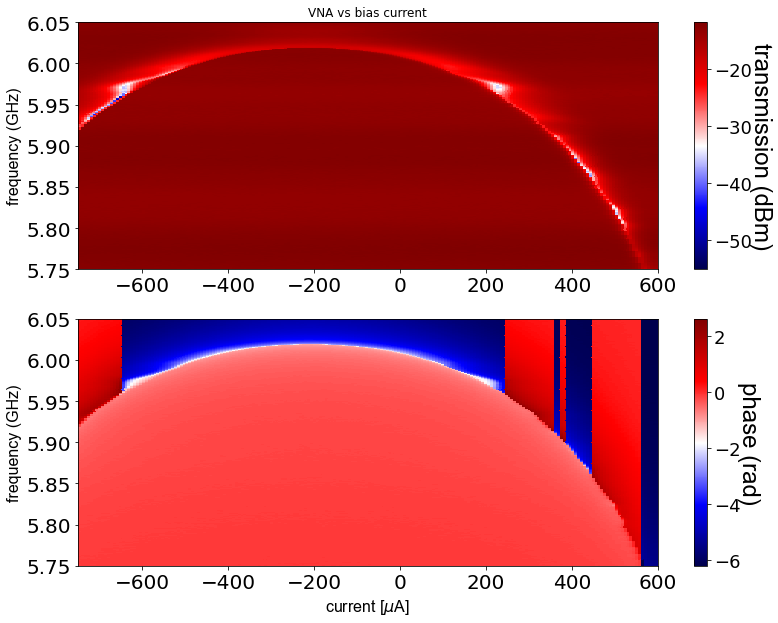

In [816]:
fig, axes = plt.subplots(2,1,figsize=(13, 10))

axes[0].set_title('VNA vs bias current')
axes[0].tick_params(axis='x', labelsize=20)
axes[0].tick_params(axis='y', labelsize=20)
axes[1].tick_params(axis='x', labelsize=20)
axes[1].tick_params(axis='y', labelsize=20)
axes[0].set_ylabel('frequency (GHz)', fontsize=16, **hfont)
axes[1].set_xlabel('current [$\mu$A]', fontsize=16, **hfont)
axes[1].set_ylabel('frequency (GHz)', fontsize=16, **hfont)
    
p = axes[0].pcolor(current*1e6, freq, 10*np.log(Transmission.T), cmap=cm.seismic)   
cb = fig.colorbar(p, ax=axes[0])
cb.set_label(r'transmission (dBm)', labelpad=20, rotation=270, fontsize=24, **hfont)
cb.ax.tick_params(labelsize=18)
    
p = axes[1].pcolor(current*1e6, freq,  Phase.T, cmap=cm.seismic)
cb = fig.colorbar(p, ax=axes[1])
cb.set_label(r'phase (rad)', labelpad=20, rotation=270, fontsize=24, **hfont)
cb.ax.tick_params(labelsize=18)
    

plt.gcf().set_size_inches(13,10)
plt.savefig("experimental data/+600-750mkA.png", bbox_inches="tight")
PHOTO_PATH = 'experimental data/+600-750mkA.png'
telegram_photo_notification("Result of the measurement", PHOTO_PATH, t_id, c_id)
complete_sound()

# VNA data vs pump power

In [638]:
current_src.set_status(1)

True

In [970]:
ramp_current_sourse(-500.0e-6)

In [971]:
current_src.get_current()

-0.0005

In [843]:
vna.set_xlim(5.9e9,6.0e9)
vna.set_nop(1001)
vna.set_average(1)
vna.set_averages(2)
vna.set_bandwidth(1000)
vna.set_power(-55)
sleep_time = vna.get_sweep_time()/1000

In [845]:
lo1.set_status(False)
lo1.set_power(-34)
lo1.set_frequency(11.97e9)

True

In [846]:
x,y = vna.get_tracedata(format = 'AMPPHA')

In [847]:
freq_steps = vna.get_nop()
freq=np.linspace(vna.get_startfreq()/1e9,vna.get_stopfreq()/1e9, freq_steps)       

power_steps = 16
power = np.linspace(-5, 10, power_steps)

In [848]:
Transmission = np.zeros((power_steps,freq_steps), dtype=float)
Phase = np.zeros((power_steps,freq_steps), dtype=float)

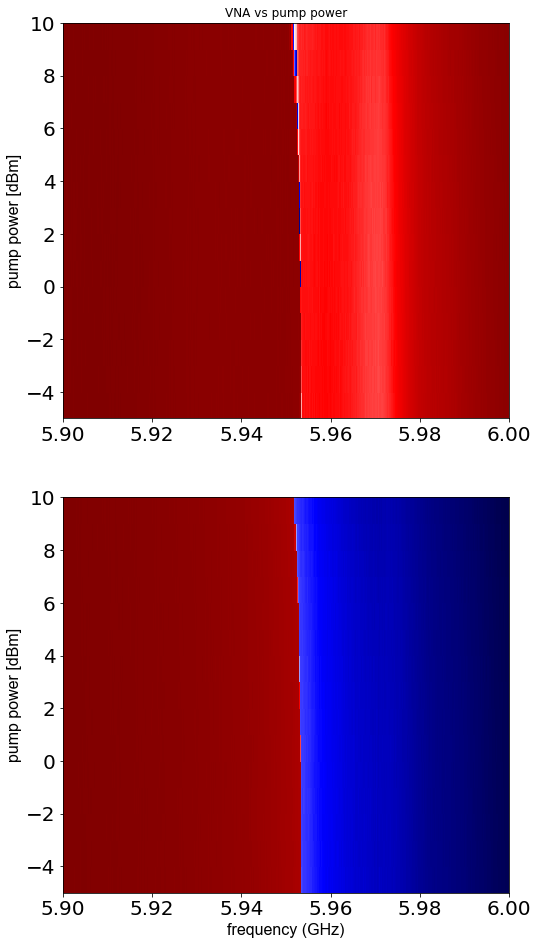

Power:  -5.0 [dBm]


<ipython-input-849-940c743aa084>:38: RuntimeWarning: divide by zero encountered in log
  p = axes[0].pcolor(freq, power, 10*np.log(Transmission), cmap=cm.seismic)
<ipython-input-849-940c743aa084>:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = axes[0].pcolor(freq, power, 10*np.log(Transmission), cmap=cm.seismic)
<ipython-input-849-940c743aa084>:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = axes[1].pcolor(freq, power, Phase, cmap=cm.seismic)


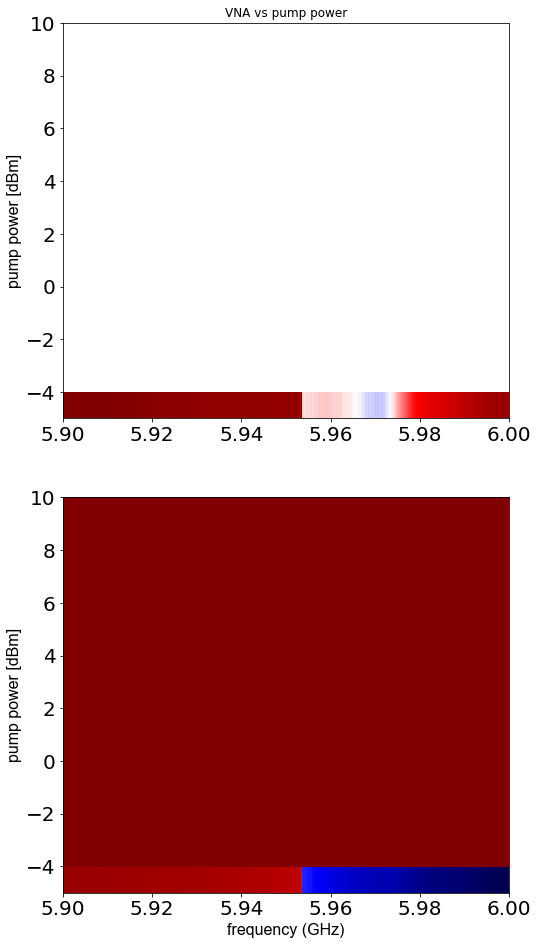

Power:  -4.0 [dBm]
Power:  -3.0 [dBm]
Power:  -2.0 [dBm]
Power:  -1.0 [dBm]
Power:  0.0 [dBm]
Power:  1.0 [dBm]
Power:  2.0 [dBm]
Power:  3.0 [dBm]
Power:  4.0 [dBm]
Power:  5.0 [dBm]
Power:  6.0 [dBm]
Power:  7.0 [dBm]
Power:  8.0 [dBm]
Power:  9.0 [dBm]
Power:  10.0 [dBm]


In [849]:
name = "experimental data/vna JPA,650mkA bias, pump power sweep from -5dBm to 10dBm"+datetime.datetime.now().strftime("%Y%m%d%H%M%S.txt")
file = open(name,"w")

fig, axes = plt.subplots(2,1,figsize=(8, 16))
hfig = display(fig, display_id=True)

lo1.set_status(True)

for power_id, power_value in enumerate(power):
    print('Power: ', round(power_value,3), '[dBm]')
    
    lo1.set_power(power_value)
    sleep(0.3)
    
    x,y = vna.get_tracedata(format = 'AMPPHA')
    sleep(sleep_time)
    sleep(0.2)
    
    file.write(f"{power_value}\n")
    file.write(f"{list(x)}\n")
    file.write(f"{list(y)}\n")
    
    Transmission[power_id] = x 
    Phase[power_id] = total_unwrap(y)-total_unwrap(y1) 

    # dynamic plot
    axes[0].cla()
    axes[1].cla()
    axes[0].set_title('VNA vs pump power')
    axes[0].tick_params(axis='x', labelsize=20)
    axes[0].tick_params(axis='y', labelsize=20)
    axes[1].tick_params(axis='x', labelsize=20)
    axes[1].tick_params(axis='y', labelsize=20)
    axes[0].set_ylabel('pump power [dBm]', fontsize=16, **hfont)
    axes[1].set_xlabel('frequency (GHz)', fontsize=16, **hfont)
    axes[1].set_ylabel('pump power [dBm]', fontsize=16, **hfont)
    
    p = axes[0].pcolor(freq, power, 10*np.log(Transmission), cmap=cm.seismic)

    p = axes[1].pcolor(freq, power, Phase, cmap=cm.seismic)
    
    hfig.update(fig)
    plt.pause(0.1)
    
lo1.set_status(False)
file.close()
telegram_notification('The measurement is complite')

<ipython-input-850-0e7dc02fb455>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = axes[0].pcolor(freq, power, 10*np.log(Transmission), cmap=cm.seismic)
<ipython-input-850-0e7dc02fb455>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = axes[1].pcolor(freq, power, Phase, cmap=cm.seismic)


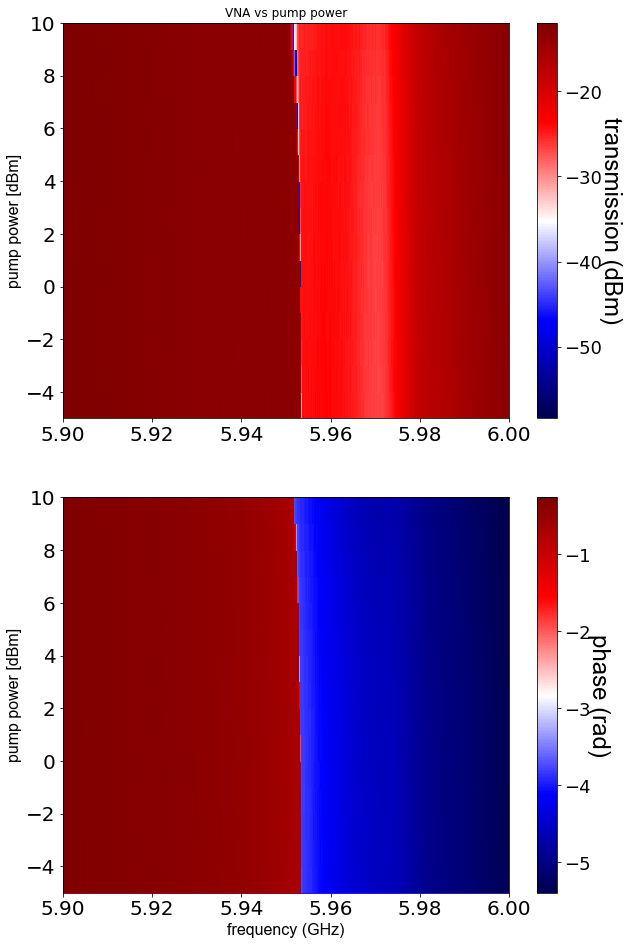

In [850]:
fig, axes = plt.subplots(2,1,figsize=(10, 16))

axes[0].set_title('VNA vs pump power')
axes[0].tick_params(axis='x', labelsize=20)
axes[0].tick_params(axis='y', labelsize=20)
axes[1].tick_params(axis='x', labelsize=20)
axes[1].tick_params(axis='y', labelsize=20)
axes[0].set_ylabel('pump power [dBm]', fontsize=16, **hfont)
axes[1].set_xlabel('frequency (GHz)', fontsize=16, **hfont)
axes[1].set_ylabel('pump power [dBm]', fontsize=16, **hfont)
    
p = axes[0].pcolor(freq, power, 10*np.log(Transmission), cmap=cm.seismic)
cb = fig.colorbar(p, ax=axes[0])
cb.set_label(r'transmission (dBm)', labelpad=20, rotation=270, fontsize=24, **hfont)
cb.ax.tick_params(labelsize=18)
    
p = axes[1].pcolor(freq, power, Phase, cmap=cm.seismic)
cb = fig.colorbar(p, ax=axes[1])
cb.set_label(r'phase (rad)', labelpad=20, rotation=270, fontsize=24, **hfont)
cb.ax.tick_params(labelsize=18)
    

plt.gcf().set_size_inches(10,16)
plt.savefig("experimental data/-650mkA_pump_power_sweep.png", bbox_inches="tight")
PHOTO_PATH = 'experimental data/-650mkA_pump_power_sweep.png'
telegram_photo_notification("Result of the measurement", PHOTO_PATH, t_id, c_id)
complete_sound()

# Plotting VNA data vs power

In [122]:
vna.set_xlim(5.75e9,6.25e9)
vna.set_nop(2001)
vna.set_average(1)
vna.set_averages(2)
vna.set_bandwidth(1000)
vna.set_power(-70)
sleep_time = vna.get_sweep_time()/1000

In [123]:
x,y = vna.get_tracedata(format = 'AMPPHA')

In [124]:
freq_steps = vna.get_nop()
freq=np.linspace(vna.get_startfreq()/1e9,vna.get_stopfreq()/1e9, freq_steps)       

power_steps = 30
power = np.linspace(vna.get_power(), -40, power_steps)

In [125]:
Transmission = np.zeros((power_steps,freq_steps), dtype=float)
Phase = np.zeros((power_steps,freq_steps), dtype=float)

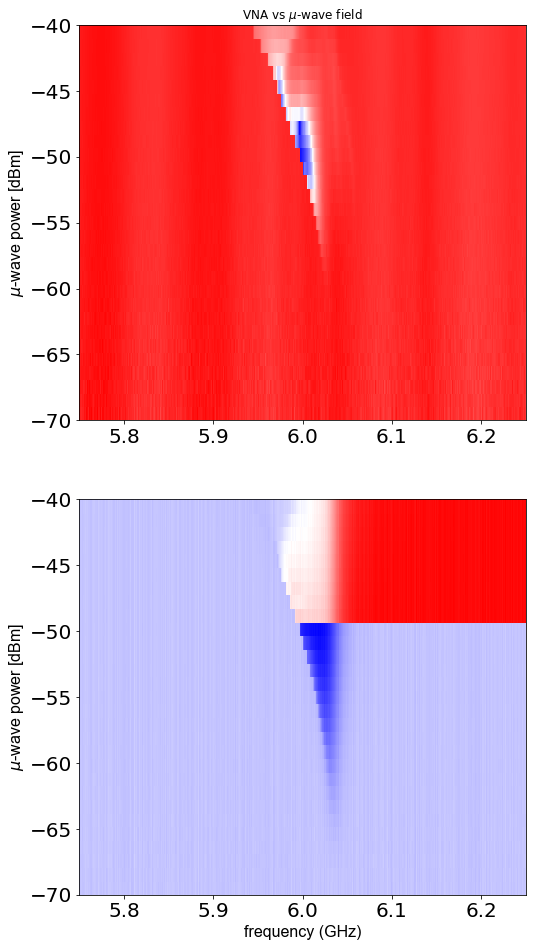

Power:  -70.0 [dBm]


<ipython-input-126-c01b25b2a81d>:43: RuntimeWarning: divide by zero encountered in log
  p = axes[0].pcolor(freq, power, 10*np.log(Transmission), cmap=cm.bwr)
<ipython-input-126-c01b25b2a81d>:43: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = axes[0].pcolor(freq, power, 10*np.log(Transmission), cmap=cm.bwr)
<ipython-input-126-c01b25b2a81d>:48: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = axes[1].pcolor(freq, power, Phase, cmap=cm.bwr)


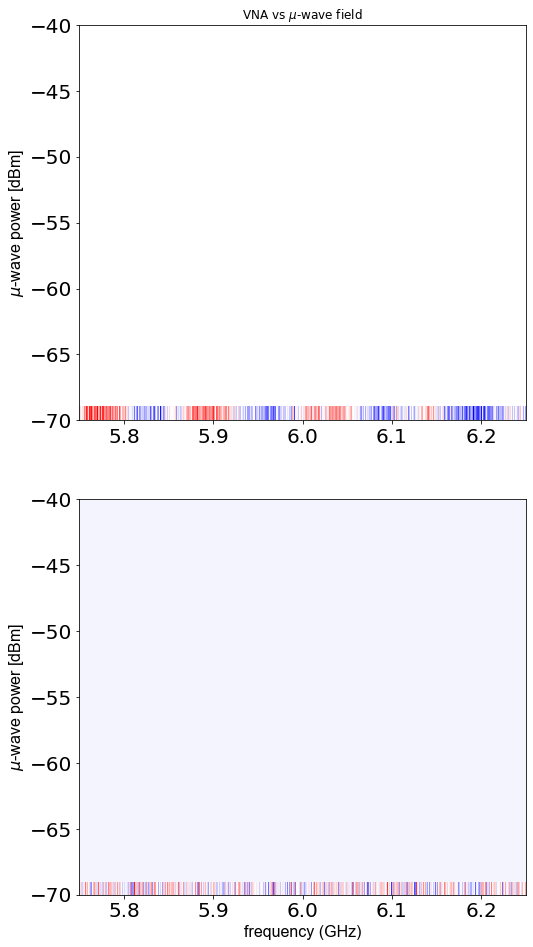

Power:  -68.966 [dBm]
Power:  -67.931 [dBm]
Power:  -66.897 [dBm]
Power:  -65.862 [dBm]
Power:  -64.828 [dBm]
Power:  -63.793 [dBm]
Power:  -62.759 [dBm]
Power:  -61.724 [dBm]
Power:  -60.69 [dBm]
Power:  -59.655 [dBm]
Power:  -58.621 [dBm]
Power:  -57.586 [dBm]
Power:  -56.552 [dBm]
Power:  -55.517 [dBm]
Power:  -54.483 [dBm]
Power:  -53.448 [dBm]
Power:  -52.414 [dBm]
Power:  -51.379 [dBm]
Power:  -50.345 [dBm]
Power:  -49.31 [dBm]
Power:  -48.276 [dBm]
Power:  -47.241 [dBm]
Power:  -46.207 [dBm]
Power:  -45.172 [dBm]
Power:  -44.138 [dBm]
Power:  -43.103 [dBm]
Power:  -42.069 [dBm]
Power:  -41.034 [dBm]
Power:  -40.0 [dBm]


In [126]:
name = "experimental data/vna JPA 3Dscan,power sweep from -70dBm to -40dBm"+datetime.datetime.now().strftime("%Y%m%d%H%M%S.txt")
file = open(name,"w")

fig, axes = plt.subplots(2,1,figsize=(8, 16))
hfig = display(fig, display_id=True)

for power_id, power_value in enumerate(power):
    print('Power: ', round(power_value,3), '[dBm]')
    
    vna.set_power(power_value)
    sleep(0.3)
    
    x,y = vna.get_tracedata(format = 'AMPPHA')
    sleep(sleep_time)
    sleep(0.2)
    
    
    #file.write(f"{power_value}\n")
    #for row in x:
    #    file.write(row)
    #for row in y:
    #    file.write(row)
    
    file.write(f"{power_value}\n")
    file.write(f"{x}\n")
    file.write(f"{y}\n")
    
    Transmission[power_id] = x 
    Phase[power_id] = total_unwrap(y)-total_unwrap(y1) 

    # dynamic plot
    axes[0].cla()
    axes[1].cla()
    axes[0].set_title('VNA vs $\mu$-wave field')
    axes[0].tick_params(axis='x', labelsize=20)
    axes[0].tick_params(axis='y', labelsize=20)
    axes[1].tick_params(axis='x', labelsize=20)
    axes[1].tick_params(axis='y', labelsize=20)
    axes[0].set_ylabel('$\mu$-wave power [dBm]', fontsize=16, **hfont)
    axes[1].set_xlabel('frequency (GHz)', fontsize=16, **hfont)
    axes[1].set_ylabel('$\mu$-wave power [dBm]', fontsize=16, **hfont)
    
    p = axes[0].pcolor(freq, power, 10*np.log(Transmission), cmap=cm.bwr)
    #cb = fig.colorbar(p, ax=axes[0])
    #cb.set_label(r'transmission (dBm)', labelpad=20, rotation=270, fontsize=24, **hfont)
    #cb.ax.tick_params(labelsize=18)
    
    p = axes[1].pcolor(freq, power, Phase, cmap=cm.bwr)
    #cb = fig.colorbar(p, ax=axes[1])
    #cb.set_label(r'phase (rad)', labelpad=20, rotation=270, fontsize=24, **hfont)
    #cb.ax.tick_params(labelsize=18)
    
    hfig.update(fig)
    plt.pause(0.1)
    
file.close()
complete_sound()

In [130]:
complete_sound()

# substract the background

In [131]:
Transmission_nobg = np.zeros((power_steps,freq_steps), dtype=float)
for i_id,i_value in enumerate(Transmission_nobg):
    Transmission_nobg[i_id]=10*np.log(Transmission[i_id])-10*np.log(Transmission[0])

<ipython-input-132-1c9123f86e2b>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = axes.pcolor(freq, power, Transmission_nobg, cmap=cm.bwr)


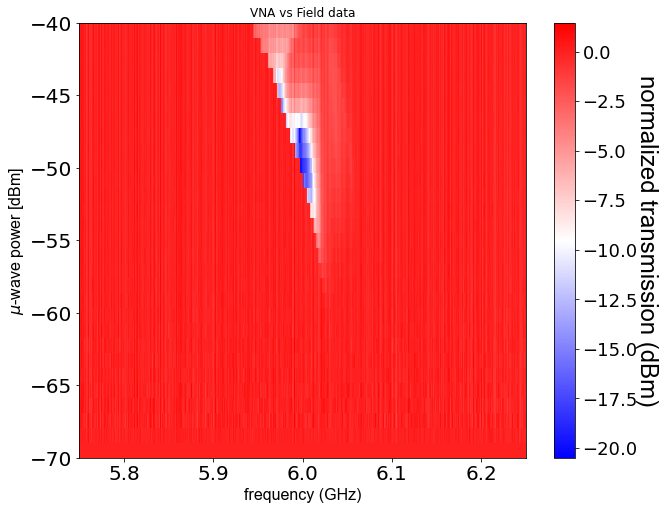

In [132]:
fig, axes = plt.subplots(1,1,figsize=(10, 8))

axes.set_title('VNA vs Field data')
axes.tick_params(axis='x', labelsize=20)
axes.tick_params(axis='y', labelsize=20)

axes.set_ylabel('$\mu$-wave power [dBm]', fontsize=16, **hfont)
axes.set_xlabel('frequency (GHz)', fontsize=16, **hfont)

p = axes.pcolor(freq, power, Transmission_nobg, cmap=cm.bwr)

cb = fig.colorbar(p, ax=axes)
cb.set_label(r'normalized transmission (dBm)', labelpad=20, rotation=270, fontsize=24, **hfont)
cb.ax.tick_params(labelsize=18)

# power and freq pump sweep

In [1256]:
vna.set_xlim(6.0e9,6.0e9)
vna.set_nop(3)
vna.set_average(1)
vna.set_averages(2)
vna.set_bandwidth(100)
vna.set_power(-55)
sleep_time = vna.get_sweep_time()/1000

In [1260]:
lo1.set_status(False)
lo1.set_power(-54)
lo1.set_frequency(12.0e9+10e6)

True

In [1261]:
x,y = vna.get_tracedata(format = 'AMPPHA')

In [1262]:
freq_steps = 400
freq=np.linspace(12.000e9-200e6,12.000e9+200e6, freq_steps)       

power_steps = 10
power = np.linspace(0, 10, power_steps)

In [1263]:
Transmission = np.zeros((power_steps,freq_steps), dtype=float)
Phase = np.zeros((power_steps,freq_steps), dtype=float)

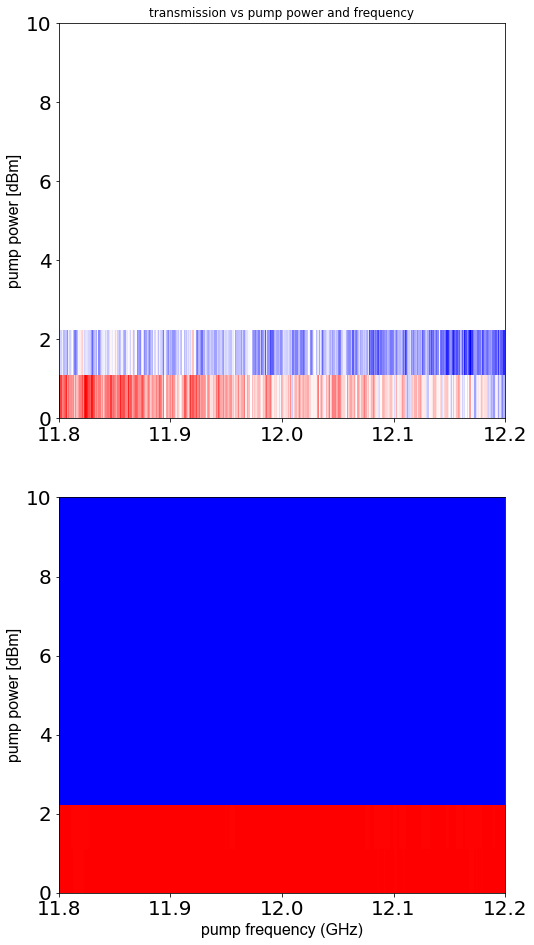

Power:  0.0 [dBm]


<ipython-input-1264-3f46c295c1d1>:46: RuntimeWarning: divide by zero encountered in log
  p = axes[0].pcolor(freq/1e9, power, 10*np.log(Transmission), cmap=cm.bwr)
<ipython-input-1264-3f46c295c1d1>:46: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = axes[0].pcolor(freq/1e9, power, 10*np.log(Transmission), cmap=cm.bwr)
<ipython-input-1264-3f46c295c1d1>:51: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = axes[1].pcolor(freq/1e9, power, Phase, cmap=cm.bwr)


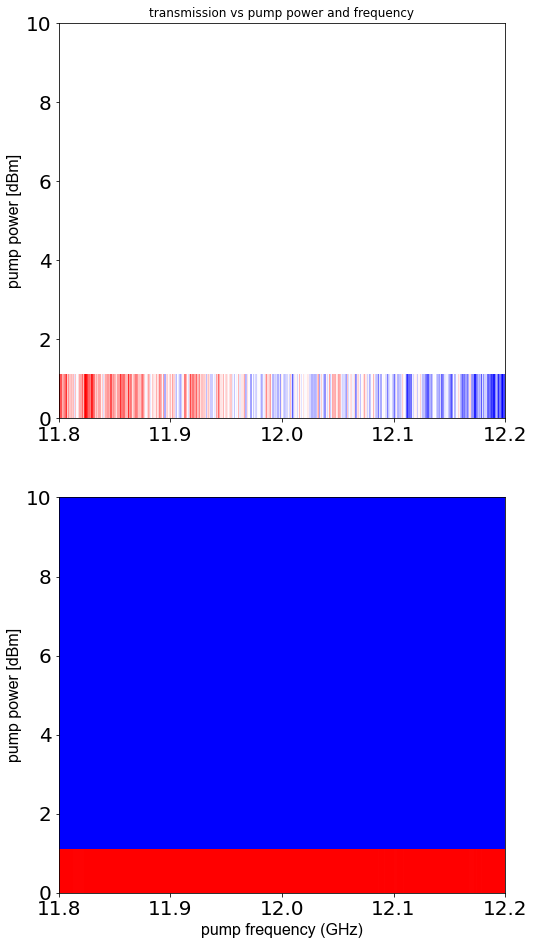

Power:  1.111 [dBm]
Power:  2.222 [dBm]


KeyboardInterrupt: 

In [1264]:
name = "experimental data/vna JPA 3Dscan"+datetime.datetime.now().strftime("%Y%m%d%H%M%S.txt")
file = open(name,"w")

fig, axes = plt.subplots(2,1,figsize=(8, 16))
hfig = display(fig, display_id=True)

lo1.set_status(True)

for power_id, power_value in enumerate(power):
    print('Power: ', round(power_value,3), '[dBm]')
    
    lo1.set_power(power_value)
    sleep(0.3)
    
    XX = []
    YY = []
    
    for freq_id, freq_value in enumerate(freq):
        lo1.set_frequency(freq_value)
        
        x,y = vna.get_tracedata(format = 'AMPPHA')
        sleep(sleep_time)
        sleep(0.1)
        XX.append(x[1])
        YY.append(y[1])
    
    file.write(f"{power_value}\n")
    file.write(f"{list(XX)}\n")
    file.write(f"{list(YY)}\n")
    
    Transmission[power_id] = XX 
    Phase[power_id] = YY

    # dynamic plot
    axes[0].cla()
    axes[1].cla()
    axes[0].set_title('transmission vs pump power and frequency')
    axes[0].tick_params(axis='x', labelsize=20)
    axes[0].tick_params(axis='y', labelsize=20)
    axes[1].tick_params(axis='x', labelsize=20)
    axes[1].tick_params(axis='y', labelsize=20)
    axes[0].set_ylabel('pump power [dBm]', fontsize=16, **hfont)
    axes[1].set_xlabel('pump frequency (GHz)', fontsize=16, **hfont)
    axes[1].set_ylabel('pump power [dBm]', fontsize=16, **hfont)
    
    p = axes[0].pcolor(freq/1e9, power, 10*np.log(Transmission), cmap=cm.bwr)
    #cb = fig.colorbar(p, ax=axes[0])
    #cb.set_label(r'transmission (dBm)', labelpad=20, rotation=270, fontsize=24, **hfont)
    #cb.ax.tick_params(labelsize=18)
    
    p = axes[1].pcolor(freq/1e9, power, Phase, cmap=cm.bwr)
    #cb = fig.colorbar(p, ax=axes[1])
    #cb.set_label(r'phase (rad)', labelpad=20, rotation=270, fontsize=24, **hfont)
    #cb.ax.tick_params(labelsize=18)
    
    hfig.update(fig)
    plt.pause(0.1)
    
lo1.set_status(False)
file.close()
telegram_notification('The measurement is complite')

In [ ]:
fig, axes = plt.subplots(2,1,figsize=(10, 16))

axes[0].set_title('transmission vs pump power and frequency')
axes[0].tick_params(axis='x', labelsize=20)
axes[0].tick_params(axis='y', labelsize=20)
axes[1].tick_params(axis='x', labelsize=20)
axes[1].tick_params(axis='y', labelsize=20)
axes[0].set_ylabel('pump power [dBm]', fontsize=16, **hfont)
axes[1].set_xlabel('pump frequency (GHz)', fontsize=16, **hfont)
axes[1].set_ylabel('pump power [dBm]', fontsize=16, **hfont)
    
p = axes[0].pcolor(freq/1e9, power, 10*np.log(Transmission), cmap=cm.bwr)
cb = fig.colorbar(p, ax=axes[0])
cb.set_label(r'transmission (dBm)', labelpad=20, rotation=270, fontsize=24, **hfont)
cb.ax.tick_params(labelsize=18)
    
p = axes[1].pcolor(freq/1e9, power, Phase, cmap=cm.bwr)
cb = fig.colorbar(p, ax=axes[1])
cb.set_label(r'phase (rad)', labelpad=20, rotation=270, fontsize=24, **hfont)
cb.ax.tick_params(labelsize=18)
    

plt.gcf().set_size_inches(10,16)
plt.savefig("experimental data/data.pdf", bbox_inches="tight")
PHOTO_PATH = 'experimental data/data.pdf'
telegram_photo_notification("Result of the measurement", PHOTO_PATH, t_id, c_id)
complete_sound()